In [1]:
import pickle
import signalprocessing as sigp
import seaborn as sn
import soundmfccparams as smfccp

In [2]:
# Path for packs
signalPath = r"/home/vaclav/Desktop/Diploma/Dirty Signals/Test/Test01/"

# Path for RandomForestClassifier
classifierPath = "/home/vaclav/Desktop/Diploma/Notebooks/Classifier/classificator.sav"

In [3]:
# Extracting the dataframes (data characteristics)
signalDataFrame = sigp.extract_data(signalPath)

In [4]:
#signalDataFrame = smfccp.pca_dataframe(signalDataFrame, 15)
#rng = range(0, int((len(list(signalDataFrame))-1)/2)+1)
#new_cols = ['type_' + str(i) for i in rng] + ['expt_' + str(i) for i in rng]
#signalDataFrame.columns = new_cols[:len(list(signalDataFrame))]
signalDataFrame

,Total MaxAmp,SCO
0,97505.874543,1649.056233
1,185030.338037,2815.715062
2,85987.236095,1596.476263
3,78155.529534,1477.174483
4,94217.693028,1649.481460
...,...,...
1097,95467.379219,1541.266712
1098,189928.578885,3052.976854
1099,76498.620058,1498.551977
1100,40171.027605,977.592076


In [5]:
# Load the model from disk
loaded_model = pickle.load(open(classifierPath, 'rb'))

In [6]:
# Predicting the classification
predictedData = loaded_model.predict(signalDataFrame)
predictedsignalDataFrame = signalDataFrame.assign(Flag=predictedData)

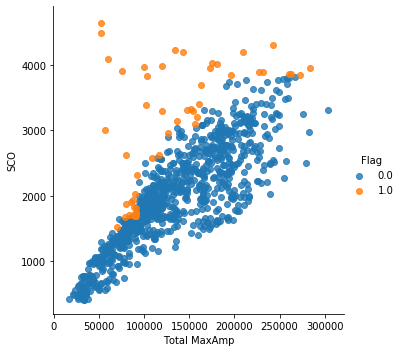

In [7]:
sn.lmplot('Total MaxAmp', 'SCO', data=predictedsignalDataFrame, hue="Flag", fit_reg=False)

In [10]:
# Loading wav files for spectrogramms
audiolist = sigp.load_list_of_wav(signalPath)
temp = audiolist
ppredictedsignalDataFrame = predictedsignalDataFrame.loc[predictedsignalDataFrame['Flag'] == 1]

In [11]:
ppredictedsignalDataFrame.head()

,Total MaxAmp,SCO,Flag
25,158114.842855,3208.866238,1.0
31,89418.617164,1697.182986,1.0
46,133786.201797,4233.121875,1.0
53,262387.357751,3862.665272,1.0
81,102420.347893,3394.636760,1.0


No handles with labels found to put in legend.


Signal amount is  55
Signal № 81
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


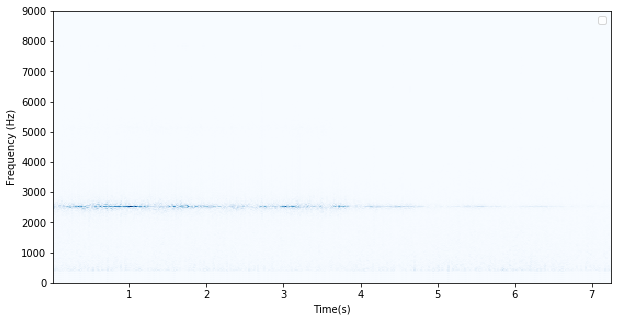

<Figure size 576x432 with 0 Axes>

In [15]:
sigp.plot_all_spectrogramms(audiolist, predictedsignalDataFrame, 512, 4, 5, 1) # last param is activator , 1 - start, 0 - none

In [16]:
audiolist[81].make_audio()

In [18]:
sigp.copy_filtered_signal(signalPath, 81)

In [19]:
# Freeing the memory
del audiolist[:]
audiolist = None
del audiolist